In [49]:
#notebook to be used for cleaning and organizing data
%matplotlib inline 
#can use inline if we prefer

In [629]:
import matplotlib.pyplot as plt
import pandas as pd
import plotly.plotly as py
import plotly.graph_objs as go
import plotly.tools as tls
import numpy as np
from config import api_key
import scipy.stats as stats

#pull and read rankings
rankings_excel = 'HighSchool_100_Rankings.xlsx'
rankings = pd.read_excel(rankings_excel)
#rankings.head() - test worked

#pull and read team data
team_excel = 'Team_Data.xlsx'
team = pd.read_excel(team_excel)
del team['Hometown']
#team.head() - test worked

In [630]:
#split hometown into two columns, rename and add back into rankings
hometown_split = rankings['Hometown'].str.split(', ',expand=True)
rankings['City'] = hometown_split[0]
rankings['State'] = hometown_split[1]
del rankings['Hometown']
rankings.head()

,Year,RSCI,Player Name,Position,College,City,State
0,2018,1,R.J. Barrett,SF,Duke,Montverde,FL
1,2018,2,Cameron Reddish,SG,Duke,Norristown,PA
2,2018,3,Nassir Little,SF,North Carolina,Orlando,FL
3,2018,4,Zion Williamson,PF,Duke,Spartanburg,SC
4,2018,5,Romeo Langford,SG,Indiana,New Albany,IN


In [631]:
#team data, reprinting for ease
team.head()

,Player,Team,Year,Class,Pos,RSCI Top 100,Pts.,Winner
0,Jay Williams,Duke,2001,SO,G,3.0,21.6,Yes
1,Shane Battier,Duke,2001,SR,F,NaN,19.9,Yes
2,Mike Dunleavy,Duke,2001,SO,F,26.0,12.6,Yes
3,Nate James,Duke,2001,SR,F,NaN,12.3,Yes
4,Carlos Boozer,Duke,2001,SO,C,8.0,13.3,Yes


In [632]:
#state count
state_df = pd.DataFrame(rankings.groupby('State').count())
state_df = state_df.reset_index()
state_df.head()

,State,Year,RSCI,Player Name,Position,College,City
0,AL,23,23,23,23,23,23
1,AN,1,1,1,1,1,1
2,AR,9,9,9,9,9,9
3,AUS,1,1,1,1,1,1
4,AZ,6,6,6,6,6,6


In [634]:
#Team Data/Class makeup by year
year_team_grade = team.groupby(['Year','Team'])['Class'].value_counts()
year_team_grade.head()

Year  Team     Class
2001  Arizona  SO       3
               SR       3
               JR       2
      Duke     SO       4
               SR       2
Name: Class, dtype: int64

In [635]:
#total grades in tournament
grade = team.groupby('Class').count()
grade

#team upperclassmen count by year
#team ranking in top 100 total

,Player,Team,Year,Pos,RSCI Top 100,Pts.,Winner
Class,,,,,,,
FR,119,119,119,119,84,119,119
JR,182,182,182,182,107,182,182
SO,151,151,151,151,101,151,151
SR,157,157,157,157,62,157,157


In [636]:
#count of grade/class in each year
grade_year_df = pd.DataFrame(team.groupby('Year')['Class'].value_counts())

grade_year_df = grade_year_df.rename(columns = {'Class' : 'Total Player per Class'})
grade_year_df = grade_year_df.reset_index()
grade_year_df.head()


,Year,Class,Total Player per Class
0,2001,SO,11
1,2001,SR,11
2,2001,JR,7
3,2001,FR,3
4,2002,JR,13


In [637]:
gradeaverage_final_four = team.groupby('Class').count()/19
gradeaverage_final_four = gradeaverage_final_four.reset_index()
gradeaverage_final_four = round(gradeaverage_final_four,2)
gradeaverage_final_four_df = gradeaverage_final_four.rename(columns = {'Player':'Average Overall'})
gradeaverage_final_four_df = gradeaverage_final_four_df.drop(gradeaverage_final_four_df.columns[[2,3,4,5,6,7,]], axis=1)

gradeaverage_final_four_df

,Class,Average Overall
0,FR,6.26
1,JR,9.58
2,SO,7.95
3,SR,8.26


In [639]:
gradeaverage_winner_df = team.loc[team["Winner"] == "Yes", :]
gradeaverage_winner_df = gradeaverage_winner_df.groupby('Class').count()/19
gradeaverage_winner_df = gradeaverage_winner_df.reset_index()
gradeaverage_winner_df = round(gradeaverage_winner_df,2)
gradeaverage_winner_df = gradeaverage_winner_df.rename(columns = {'Player':'Average Overall'})
gradeaverage_winner_df = gradeaverage_winner_df.drop(gradeaverage_winner_df.columns[[2,3,4,5,6,7,]], axis=1)
gradeaverage_winner_df

,Class,Average Overall
0,FR,1.79
1,JR,2.42
2,SO,1.89
3,SR,1.89


In [319]:
winner_grade_year_df = team.loc[team["Winner"] == "Yes", :]
winner_grade_year_df = pd.DataFrame(winner_grade_year_df.groupby('Year')['Class'].value_counts())
winner_grade_year_df = winner_grade_year_df.rename(columns = {'Class' : 'Total Player per Class'})
winner_grade_year_df = winner_grade_year_df.reset_index()
winner_grade_year_df.head()

,Year,Class,Total Player per Class
0,2001,SO,4
1,2001,SR,2
2,2001,FR,1
3,2001,JR,1
4,2002,JR,3


In [644]:
#team occurrences final four
team_finalfour = team.groupby('Team').count()/8
team_finalfour.head()

,Player,Year,Class,Pos,RSCI Top 100,Pts.,Winner
Team,,,,,,,
Arizona,1.0,1.0,1.0,1.0,0.625,1.0,1.0
Auburn,1.0,1.0,1.0,1.0,0.375,1.0,1.0
Butler,2.0,2.0,2.0,2.0,0.000,2.0,2.0
Duke,4.0,4.0,4.0,4.0,3.375,4.0,4.0
Florida,3.0,3.0,3.0,3.0,1.750,3.0,3.0


In [613]:
year_final_four_top100_df = team.groupby(['Year'])[['RSCI Top 100']].count()
year_final_four_top100_df.reset_index()
year_final_four_top100_df = year_final_four_top100_df.reset_index()
year_final_four_top100_df.head()

,Year,RSCI Top 100
0,2001,17
1,2002,16
2,2003,19
3,2004,20
4,2005,25


In [614]:
year_winner_top100_count = team.loc[team["Winner"] == "Yes", :]
year_winner_top100_df = year_winner_top100_count.groupby(['Year'])[['RSCI Top 100']].count()
year_winner_top100_df.reset_index()
year_winner_top100_df = year_winner_top100_df.reset_index()

year_winner_top100_df.head()

,Year,RSCI Top 100
0,2001,5
1,2002,4
2,2003,5
3,2004,7
4,2005,7


In [615]:
merged_top100_df = pd.merge(year_final_four_top100_df, year_winner_top100_df , on='Year')
merged_top100_df = merged_top100_df.rename(columns = {'RSCI Top 100_x' : 'Final Four Top 100','RSCI Top 100_y': 'Winner Top 100'})
merged_top100_df.head()

,Year,Final Four Top 100,Winner Top 100
0,2001,17,5
1,2002,16,4
2,2003,19,5
3,2004,20,7
4,2005,25,7


In [589]:
percentage_of_top100_in_final_four = year_winner_top100/year_final_four_top100*100
#percentage_of_top100_in_final_four
percentage_of_top100_in_final_four = percentage_of_top100_in_final_four.reset_index()
percentage_of_top100_in_final_four = round(percentage_of_top100_in_final_four,2)
percentage_of_top100_in_final_four = percentage_of_top100_in_final_four.rename(columns = {'RSCI Top 100':'Winners % of Top 100 in Final Four'})
percentage_of_top100_in_final_four.head()

,Year,Winners % of Top 100 in Final Four
0,2001,29.41
1,2002,25.00
2,2003,26.32
3,2004,35.00
4,2005,28.00


In [195]:
#top 100 players recruited by all teams over the years of our data
team_ranking_count_total = team.groupby('Team')['RSCI Top 100'].count()
team_ranking_count_total.sort_values(ascending=False).head()

Team
North Carolina    38
Michigan State    34
Kansas            31
Kentucky          31
Duke              27
Name: RSCI Top 100, dtype: int64

In [193]:
#top 100 players (their rankings) on teams in a given year
year_team_ranking_list = team.groupby(['Year','Team'])['RSCI Top 100'].count()
year_team_ranking_list.head()

Year  Team          
2001  Arizona           5
      Duke              5
      Maryland          3
      Michigan State    4
2002  Indiana           4
Name: RSCI Top 100, dtype: int64

In [623]:
###### Bins are 0, 59, 69, 79, 89, 100.   
bins = [0, 19, 39, 59, 79, 100]

# Create the names for the four bins
group_names = ["Top 20", "21-40", "41-60", "61-80","81-100"]

team["Binned 100"] = pd.cut(team["RSCI Top 100"], bins, labels=group_names)
team["Binned 100"]
team.head()

,Player,Team,Year,Class,Pos,RSCI Top 100,Pts.,Winner,Binned 100
0,Jay Williams,Duke,2001,SO,G,3.0,21.6,Yes,Top 20
1,Shane Battier,Duke,2001,SR,F,NaN,19.9,Yes,NaN
2,Mike Dunleavy,Duke,2001,SO,F,26.0,12.6,Yes,21-40
3,Nate James,Duke,2001,SR,F,NaN,12.3,Yes,NaN
4,Carlos Boozer,Duke,2001,SO,C,8.0,13.3,Yes,Top 20


In [403]:
team_binned_df = team.loc[team["Winner"] == "Yes", :]
team_binned_df  = pd.DataFrame(team_binned_df .groupby('Year')['Binned 100'].value_counts())
team_binned_df  = team_binned_df.rename(columns = {'Binned 100' : 'Total Players'})
#team_binned_df  = winner_grade_year_df.reset_index()
team_binned_df.head()

Total Players
Year Binned 100               
2001 Top 20                  4
     21-40                   1
2002 21-40                   1
     41-60                   1
     61-80                   1

In [404]:
final_four_binned_df = pd.DataFrame(team.groupby('Year')['Binned 100'].value_counts())

final_four_binned_df = final_four_binned_df.rename(columns = {'Binned 100' : 'Total Player'})
#final_four_binned_df = final_four_binned_df.reset_index()
final_four_binned_df.head()

Total Player
Year Binned 100              
2001 Top 20                 8
     21-40                  4
     61-80                  2
     81-100                 2
     41-60                  1

In [625]:
winner_binned_class_df = team.loc[team["Winner"] == "Yes", :]
winner_binned_class_df = pd.DataFrame(winner_binned_class_df.groupby('Class')['Binned 100'].value_counts())
winner_binned_class_df = winner_binned_class_df.rename(columns = {'Binned 100' : 'Total Players'})
winner_binned_class_df = winner_binned_class_df.reset_index()
winner_binned_class_df.head()

,Class,Binned 100,Total Players
0,FR,Top 20,16
1,FR,21-40,5
2,FR,61-80,4
3,FR,81-100,3
4,JR,Top 20,13


In [611]:
winner_binned_class1_df = winner_binned_class_df.groupby(['Binned 100'])[['Total Players']].sum()
winner_binned_class1_df = winner_binned_class1_df.sort_values('Total Players', ascending=False)
winner_binned_class1_df

,Total Players
Binned 100,
Top 20,41
21-40,32
61-80,17
41-60,14
81-100,13


In [427]:
final_four_binned_class_df = pd.DataFrame(team.groupby('Class')['Binned 100'].value_counts())
final_four_binned_class_df= final_four_binned_class_df.rename(columns = {'Binned 100' : 'Total Players'})
final_four_binned_class_df = final_four_binned_class_df.reset_index()
final_four_binned_class_df = final_four_binned_class_df.groupby(['Binned 100'])[['Total Players']].sum()
final_four_binned_class_df = final_four_binned_class_df.sort_values('Total Players', ascending=False)
final_four_binned_class_df

,Total Players
Binned 100,
Top 20,104
21-40,100
41-60,58
61-80,49
81-100,43


[]

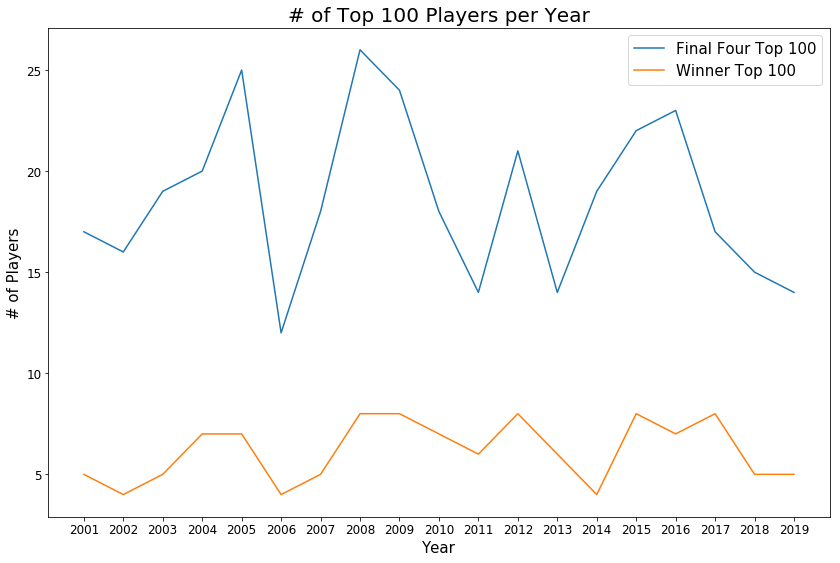

In [730]:
merged_top100_df.plot(x='Year',fontsize=12, y=['Final Four Top 100','Winner Top 100'], figsize=(14,9))
plt.ylabel('# of Players', fontsize=15)
plt.xlabel('Year', fontsize =15)
plt.title('# of Top 100 Players per Year', fontsize = 20)
plt.legend(fontsize = 15)
plt.xticks(np.arange(2001, 2020, step=1))
plt.plot()



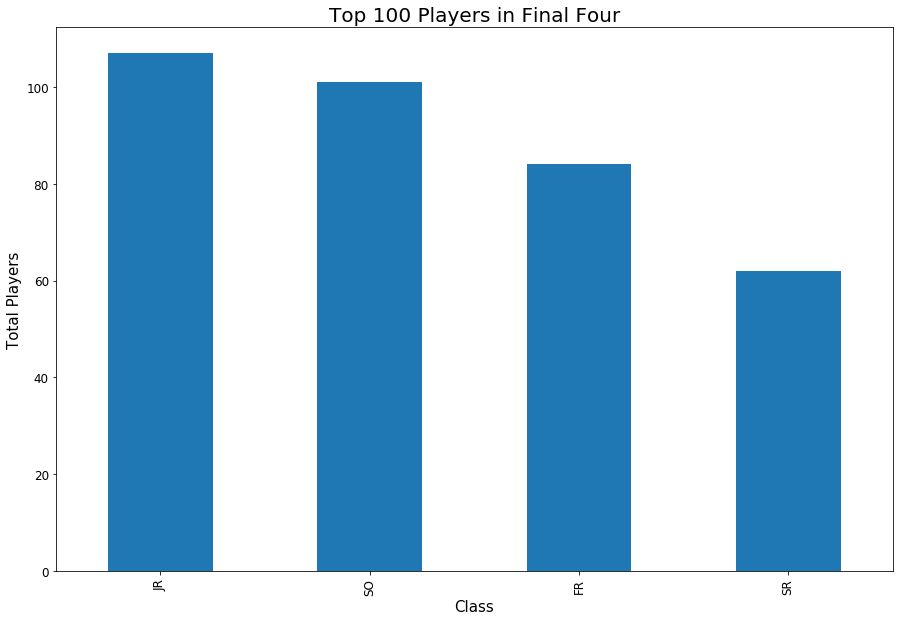

In [672]:
grade_df = team.groupby('Class').count()
grade_df = grade_df.sort_values('RSCI Top 100', ascending=False)
ax = grade_df[['RSCI Top 100']].plot(kind='bar', title ="Top 100 Players in Final Four", figsize=(15, 10), legend=False, fontsize=12)
ax.set_xlabel("Class", fontsize=15)
ax.set_ylabel("Total Players", fontsize=15)
plt.title('Top 100 Players in Final Four', fontsize = 20)
plt.xticks(fontsize=12)
plt.show() 

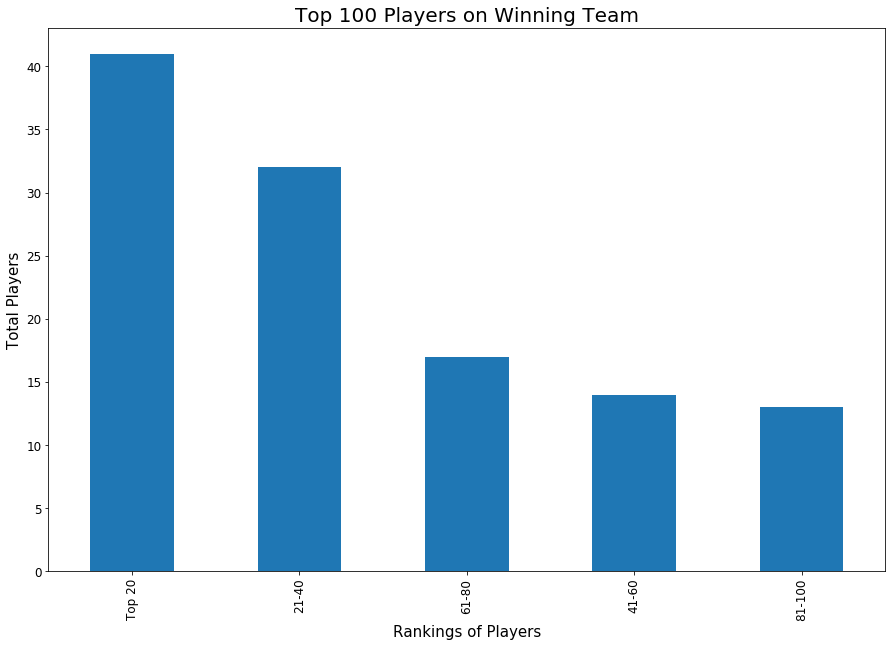

In [678]:
ax1 = winner_binned_class1_df[['Total Players']].plot(kind='bar', title ="Top 100 Players on Winning Team", figsize=(15, 10), legend=False, fontsize=12)
ax1.set_xlabel("Rankings of Players", fontsize=15)
ax1.set_ylabel("Total Players", fontsize=15)
plt.title('Top 100 Players on Winning Team', fontsize = 20)
plt.xticks(fontsize=12)
plt.show() 

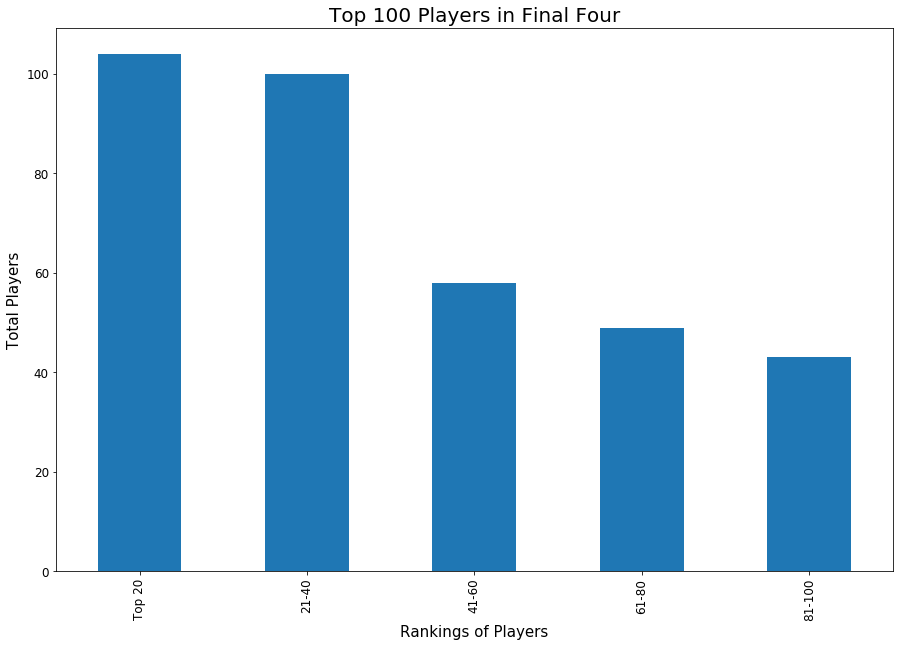

In [677]:

ax = final_four_binned_class_df[['Total Players']].plot(kind='bar', title ="Top 100 Players In Final Four", figsize=(15, 10), legend=False, fontsize=12)
ax.set_xlabel("Rankings of Players", fontsize=15)
ax.set_ylabel("Total Players", fontsize=15)
plt.title('Top 100 Players in Final Four', fontsize = 20)
plt.xticks(fontsize=12)
plt.show() 


[]

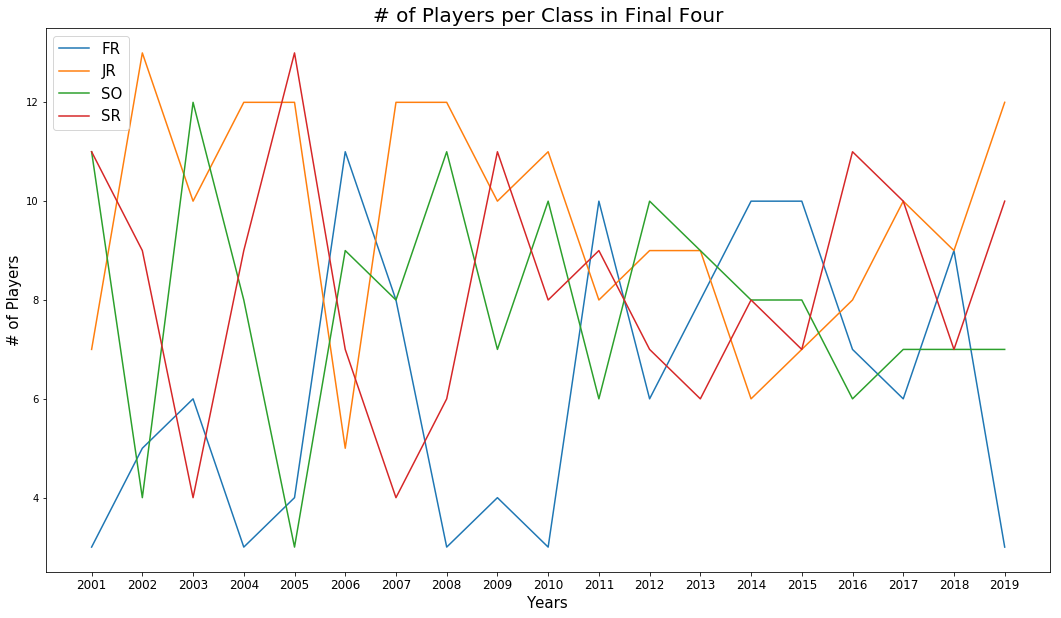

In [729]:
fig, ax = plt.subplots(figsize=(18,10))
grade_year_df.groupby(['Year','Class']).sum()['Total Player per Class'].unstack().plot(ax=ax)
plt.legend(fontsize = 15)
plt.xticks(np.arange(2001, 2020, step=1))
ax.set_xlabel("Years", fontsize=15)
ax.set_ylabel("# of Players", fontsize=15)
plt.title('# of Players per Class in Final Four', fontsize = 20)
plt.xticks(fontsize=12)
plt.plot()

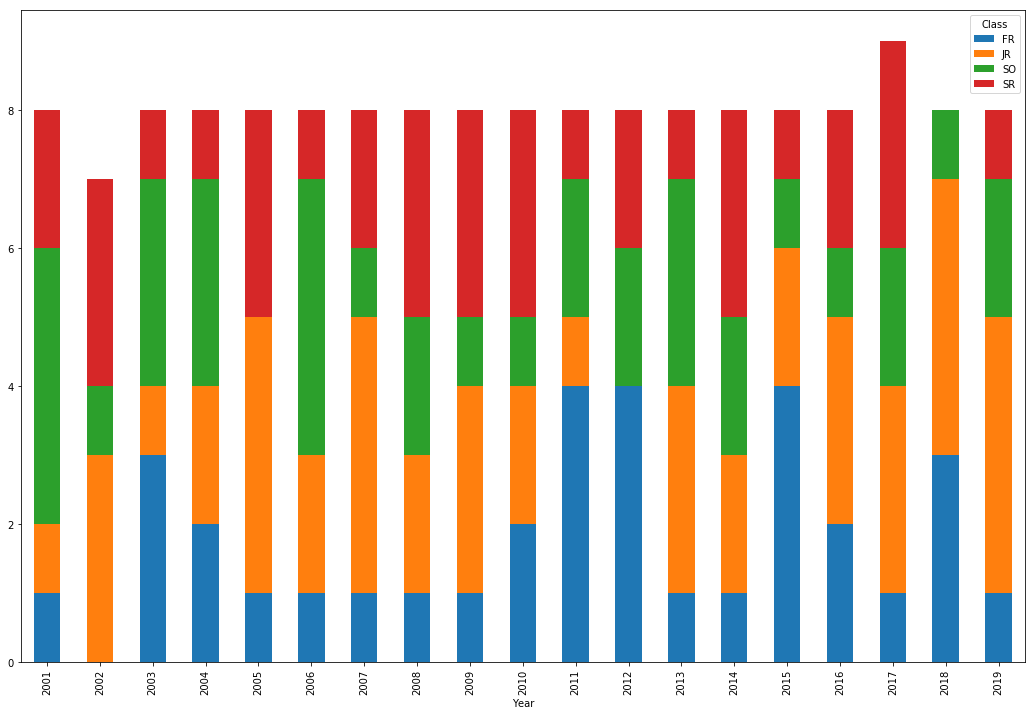

In [687]:
pivot = pd.pivot_table(winner_grade_year_df, index='Year',columns="Class", values='Total Player per Class')
pivot.plot(kind='bar',stacked=True,figsize=(18,12))

In [646]:
data = [dict(type='choropleth', autocolorscale=False, locations = state_df['State'], z= state_df['Year'], locationmode='USA-states', colorscale= 'Reds', colorbar= dict(title='Top 100 per State'))]
layout = dict(title='Top 100 Players per State', geo = dict(scope='usa', projection=dict(type='albers usa'), showlakes= True, lakecolor='rgb(66,165,245)',),)
fig = dict(data=data, layout=layout)
py.iplot(fig, filename='Top100')

High five! You successfully sent some data to your account on plotly. View your plot in your browser at https://plot.ly/~KeithRoss/0 or inside your plot.ly account where it is named 'Top100'


Text(0.5, 1.0, 'Average of Class in Final Four')

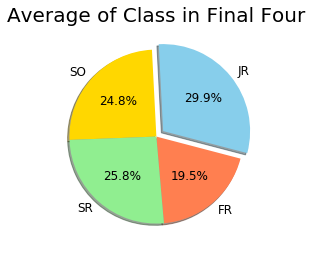

In [712]:
# Build Pie Chart
labels = gradeaverage_final_four_df["Class"]

sizes = gradeaverage_final_four_df['Average Overall']

colors = ["coral", "skyblue", "gold","lightgreen"]


explode = (0,.1,0,0)

plt.pie(sizes, explode=explode, labels=labels, colors=colors,textprops={'fontsize': 12},
        autopct="%1.1f%%", shadow=True, startangle=275)
plt.title("Average of Class in Final Four", fontsize=20)

Text(0.5, 1.0, 'Average of Class of Winner')

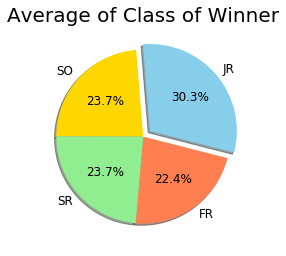

In [728]:
# Build Pie Chart
labels = gradeaverage_winner_df["Class"]

sizes = gradeaverage_winner_df['Average Overall']

colors = ["coral", "skyblue", "gold","lightgreen"]

explode = (0,.1,0,0)

plt.pie(sizes, explode=explode, labels=labels, colors=colors, textprops={'fontsize': 12},
        autopct="%1.1f%%", shadow=True, startangle=265)

plt.title("Average of Class of Winner", fontsize=20)


In [641]:
#Chi Square Test
observed = pd.Series([30.3,22.4,23.7,23.7], index = ['Junior','Freshman','Sophomore','Senior'])
df = pd.DataFrame([observed]).T
df[1] = 25
df.columns =['observed','expected']
df

,observed,expected
Junior,30.3,25
Freshman,22.4,25
Sophomore,23.7,25
Senior,23.7,25


In [645]:
#Critical Value
critical_value= stats.chi2.ppf(q=.80,df=3)
critical_value

4.64162767608745

In [573]:
stats.chisquare(df['observed'],df['expected'])

Power_divergenceResult(statistic=1.5292000000000008, pvalue=0.6755475679020975)

[]

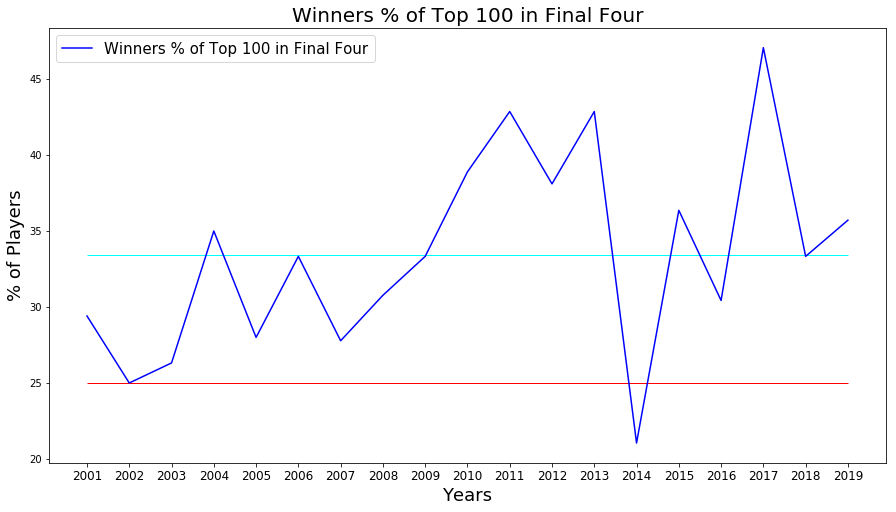

In [736]:
percentage_of_top100_in_final_four.plot(x='Year', y=['Winners % of Top 100 in Final Four'], color='blue', figsize=(15,8))
plt.hlines(y=25, xmin=2001, xmax=2019, linewidth=1, color='r')
plt.hlines(y=percentage_of_top100_in_final_four['Winners % of Top 100 in Final Four'].mean(),xmin=2001,xmax=2019, linewidth=1, color='cyan')
plt.legend(fontsize = 15)
plt.xticks(np.arange(2001, 2020, step=1))
plt.xlabel("Years", fontsize=18)
plt.ylabel("% of Players", fontsize=18)
plt.title('Winners % of Top 100 in Final Four', fontsize = 20)
plt.xticks(fontsize=12)
plt.plot()






In [588]:
#Chi Square Test
observed1 = pd.Series([29.41,25,26.32,35,28,33.33,27.78,30.77,33.33,38.89,42.86,38.1,42.86,21.05,26.36,30.43,47.06,33.33,35.71], index = ['2001','2002','2003','2004','2005','2006','2007','2008','2009','2010','2011','2012','2013','2014','2015','2016','2017','2018','2019'])
df1 = pd.DataFrame([observed1]).T
df1[1] = 25
df1.columns =['observed','expected']
df1.head()

,observed,expected
2001,29.41,25
2002,25.00,25
2003,26.32,25
2004,35.00,25
2005,28.00,25


In [585]:
#Critical Value
critical_value1= stats.chi2.ppf(q=.99,df=18)
critical_value1

34.805305734705065

In [586]:
stats.chisquare(df1['observed'],df1['expected'])

Power_divergenceResult(statistic=81.20658, pvalue=5.26560843263818e-10)